### **Customer Lifetime Value Peruasahaan Asuransi Mobil**

### **Business Problem Understanding**

**Context**

Sebuah perusahaan asuransi mobil akan mengidentifikasi Customer lifetime value (CLV) atau nilai umur pelanggan, yaitu ukuran seberapa berharga seorang pelanggan bagi perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan dan biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. 

**Problem Statement**

Menentukan target pemasaran kepada pelanggan yang memiliki value secara efektif dan bagaimana perubahan pelanggan perusahaan di masa depan.

**Analytic Approach**

Melakukan analisis data untuk dapat menemukan pola dari fitur-fitur yang ada, sehingga dapat diketahui CLV dari masing-masing pelanggan.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menentukan CLV dari seorang pelanggan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE.

### **Data Understanding**

Deskripsi dari masing-masing kolom adalah:

- Vehicle Class: Jenis kendaraan yang diasuransikan
- Coverage: Jenis perlindungan yang tersedia dalam polis asuransi
- Renew Offer Type: Tipe perpanjangan polis asuransi
- Employment Status: Status kepegawaian pelanggan
- Marital Status: Status perkawinan pelanggan
- Education: Tingkat pendidikan terakhir dari pelanggan
- Number of Policies: Jumlah polis asuransi yang dimiliki oleh pelanggan
- Monthly Premium Auto: Premi yang dibayarkan pelanggan setiap bulan
- Total Claim Amount: Jumlah klaim yang diajukan oleh pelanggan
- Income: Jumlah pendapatan pelanggan
- Customer Lifetime Value: Nilai yang dapat dihasilkan seorang pelanggan selama mempertahankan polis asuransi

In [345]:
# Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [346]:
# Dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.00,90.00,571.48,"11,828.00","10,083.49"
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.00,62.00,114.51,"44,762.00","4,943.39"
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.00,62.00,257.25,"21,514.00","11,981.98"
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.00,116.00,556.80,"17,913.00","4,550.86"
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.00,62.00,355.82,"19,030.00","2,372.16"


In [347]:
# deskripsi data customer lifetime value (CLV)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(5669, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,Vehicle Class,object,0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,3,"[Divorced, Married, Single]"
5,Education,object,0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


#### **Exploratory Data Analysis**

**Distribusi Customer Lifetime Value Asuransi Mobil**

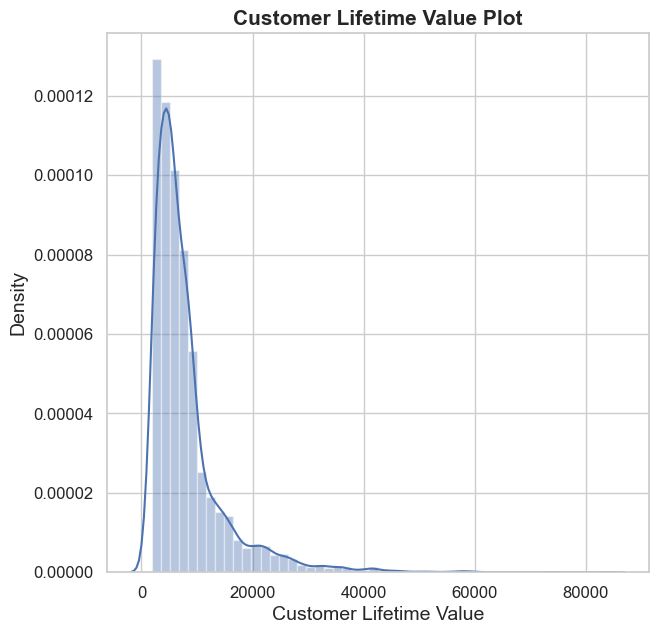

In [348]:
# Plot distribusi fitur 'Customer Lifetime Value'
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Plot', size=15, weight='bold');

Berdasarkan plot distribusi Customer Lifetime Value di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada Customer Lifetime Value.

In [349]:
# Cek jumlah CLV berdasarkan vehicle class
print(f"Jumlah CLV di tiap vehicle class:\n{df['Vehicle Class'].value_counts()}")
print(f"\nJumlah coverage:\n{df['Coverage'].value_counts()}")

Jumlah CLV di tiap vehicle class:
Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

Jumlah coverage:
Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64


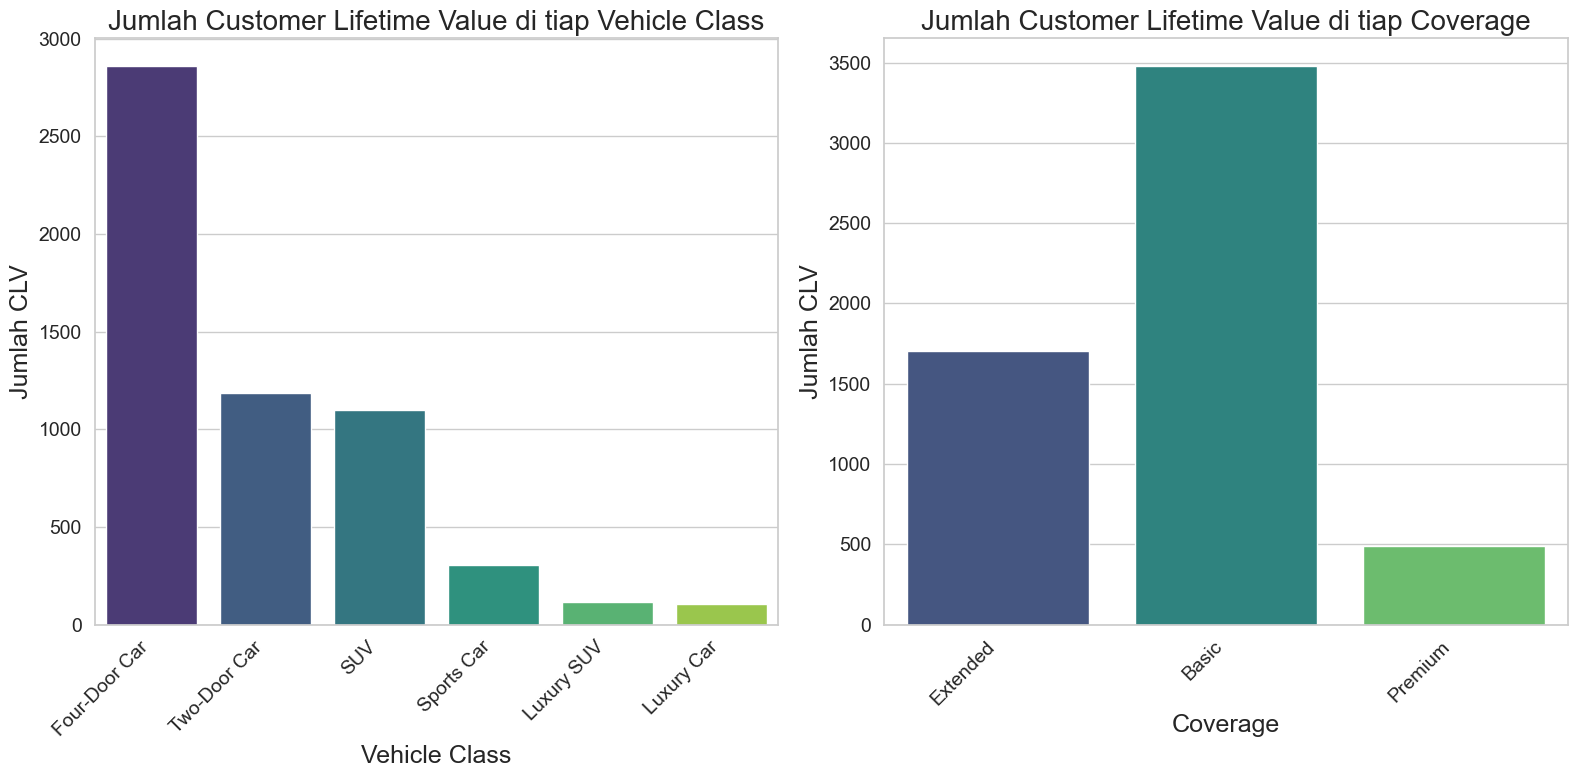

In [350]:
# Membuat figure dan axes untuk subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Ukuran grafik lebih kecil

# Membuat barchart untuk Vehicle Class
sns.countplot(data=df, x='Vehicle Class', palette='viridis', ax=axs[0])
axs[0].set_title('Jumlah Customer Lifetime Value di tiap Vehicle Class', fontsize=20)
axs[0].set_xlabel('Vehicle Class', fontsize=18)
axs[0].set_ylabel('Jumlah CLV', fontsize=18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right', fontsize=14)
axs[0].tick_params(axis='y', labelsize=14)

# Membuat barchart untuk Coverage
sns.countplot(data=df, x='Coverage', palette='viridis', ax=axs[1])
axs[1].set_title('Jumlah Customer Lifetime Value di tiap Coverage', fontsize=20)
axs[1].set_xlabel('Coverage', fontsize=18)
axs[1].set_ylabel('Jumlah CLV', fontsize=18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right', fontsize=14)
axs[1].tick_params(axis='y', labelsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

Kebanyakan kendaraan yang diasuransikan dengan tipe Four-Door Class dengan coverage asuransi terbanyak tipe basic.

In [351]:
# Mengelompokkan data berdasarkan Vehicle Class, Renew Offer Type, dan Coverage
pivot_df = df.groupby(['Vehicle Class', 'Renew Offer Type', 'Coverage']).size().unstack(fill_value=0).unstack(fill_value=0).fillna(0)

# Menampilkan pivot_df
pivot_df

Coverage          Basic                      Extended                       \
Renew Offer Type Offer1 Offer2 Offer3 Offer4   Offer1 Offer2 Offer3 Offer4   
Vehicle Class                                                                
Four-Door Car       632    592    300    226      327    291    145    105   
Luxury Car           22     14     16     12       17      6      4      3   
Luxury SUV           25     14     13      5       22     10      5      5   
SUV                 316    197     99     59      179     81     48     23   
Sports Car           84     60     26     13       52     24     11      6   
Two-Door Car        258    272    123     99      114    139     38     49   

Coverage         Premium                       
Renew Offer Type  Offer1 Offer2 Offer3 Offer4  
Vehicle Class                                  
Four-Door Car        126     70     35      9  
Luxury Car             3      7      2      1  
Luxury SUV            10      1      2      3  
SUV                   52     21     10     11  
Sports Car             9     10      8      4  
Two-Door Car          44     26     15      9

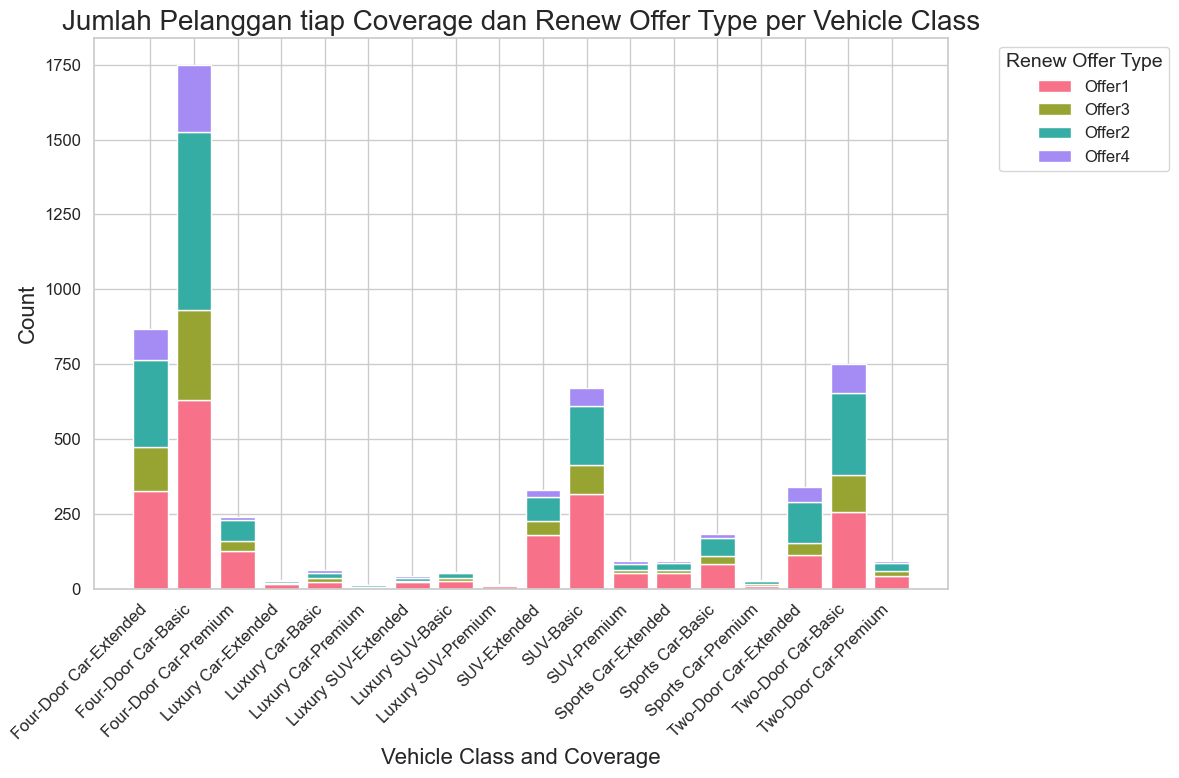

In [352]:
# Menghitung jumlah kombinasi Vehicle Class, Coverage, dan Renew Offer Type
df_count = df.groupby(['Vehicle Class', 'Coverage', 'Renew Offer Type']).size().reset_index(name='Count')

# Pivot data untuk memastikan stacked bar plot
pivot_df = df_count.pivot_table(index=['Vehicle Class', 'Coverage'], columns='Renew Offer Type', values='Count', fill_value=0).reset_index()

# Buat plot
fig, ax = plt.subplots(figsize=(12, 8))  # Ukuran figure lebih kecil

# Set warna untuk setiap jenis Renew Offer Type
renew_offer_types = df['Renew Offer Type'].unique()
colors = sns.color_palette("husl", len(renew_offer_types))

# Loop through setiap Vehicle Class dan Coverage untuk plot
for i, vehicle_class in enumerate(pivot_df['Vehicle Class'].unique()):
    for k, coverage in enumerate(df['Coverage'].unique()):
        bottom = 0
        for j, renew_offer_type in enumerate(renew_offer_types):
            if renew_offer_type in pivot_df.columns:
                values = pivot_df[(pivot_df['Vehicle Class'] == vehicle_class) & (pivot_df['Coverage'] == coverage)][renew_offer_type].values[0]
            else:
                values = 0
            
            ax.bar(vehicle_class + '-' + coverage, values, label=renew_offer_type if (i == 0 and k == 0) else "", color=colors[j], bottom=bottom)
            bottom += values

# Tambahkan judul dan label dengan font lebih besar
plt.title('Jumlah Pelanggan tiap Coverage dan Renew Offer Type per Vehicle Class', fontsize=20)
plt.xlabel('Vehicle Class and Coverage', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tambahkan legenda dengan font lebih besar
plt.legend(title='Renew Offer Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


- Kelas Kendaraan "Four-Door Car-Basic" memiliki jumlah pelanggan tertinggi dibandingkan dengan kelas kendaraan lainnya.
- Penawaran Offer1 menjadi tipe penawaran yang paling sering diberikan kepada pelanggan, terutama untuk kelas kendaraan "Four-Door Car-Basic" dan "Two-Door Car-Basic"
- Penawaran Offer4 juga memiliki jumlah yang cukup besar, terutama di kelas kendaraan "Four-Door Car-Extended"
- Kelas kendaraan dengan jumlah pelanggan yang lebih sedikit seperti "Luxury SUV-Extended" atau "Sports Car-Basic" memiliki distribusi tipe penawaran yang lebih terbatas
- Kendaraan dengan kelas "Basic" cenderung memiliki jumlah pelanggan yang lebih banyak, dan mereka lebih sering mendapatkan penawaran "Offer1"
- Kendaraan kelas "Premium" atau "Extended" memiliki variasi yang lebih besar dalam hal tipe penawaran yang diterima

In [353]:
# Mengelompokkan data berdasarkan Vehicle Class, Renew Offer Type, dan Coverage
# lalu menghitung median Customer Lifetime Value untuk setiap kelompok
pivot_df1 = df.groupby(['Vehicle Class', 'Renew Offer Type', 'Coverage'])['Customer Lifetime Value'].median().unstack(fill_value=0).unstack(fill_value=0).fillna(0)

# Mengatur tampilan float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.2f}'.format

# Menampilkan pivot_df
display(pivot_df1)

Coverage             Basic                                Extended            \
Renew Offer Type    Offer1    Offer2    Offer3    Offer4    Offer1    Offer2   
Vehicle Class                                                                  
Four-Door Car     5,208.17  4,894.14  5,097.04  4,842.27  6,480.68  6,035.09   
Luxury Car       13,786.34 13,957.96 11,331.82 14,167.08 22,062.55 15,520.06   
Luxury SUV       14,318.45 13,626.24  7,910.87  7,414.44 17,572.16 19,160.99   
SUV               8,446.36  8,176.58  8,317.30  8,253.27  9,778.98  5,351.85   
Sports Car        8,383.94  8,572.33  8,141.73  8,209.60  9,370.75  9,805.59   
Two-Door Car      4,995.87  4,636.55  4,930.95  4,954.29  6,503.40  6,680.15   

Coverage                               Premium                                
Renew Offer Type    Offer3    Offer4    Offer1    Offer2    Offer3    Offer4  
Vehicle Class                                                                 
Four-Door Car     6,134.39  6,361.95  8,607.39  7,881.82  8,888.14  4,447.42  
Luxury Car       17,356.55 15,063.50 21,766.83 11,009.13 20,854.72  9,295.41  
Luxury SUV       16,705.10 17,441.64 10,179.72  9,830.34 21,466.60 11,463.99  
SUV               9,561.09  5,583.58 13,356.55 15,042.58 12,773.11 12,655.53  
Sports Car        9,817.03  7,976.20 11,572.10  6,542.45  7,178.45  6,580.56  
Two-Door Car      6,482.12  3,768.09  8,203.09  8,800.88  4,379.77  4,419.12

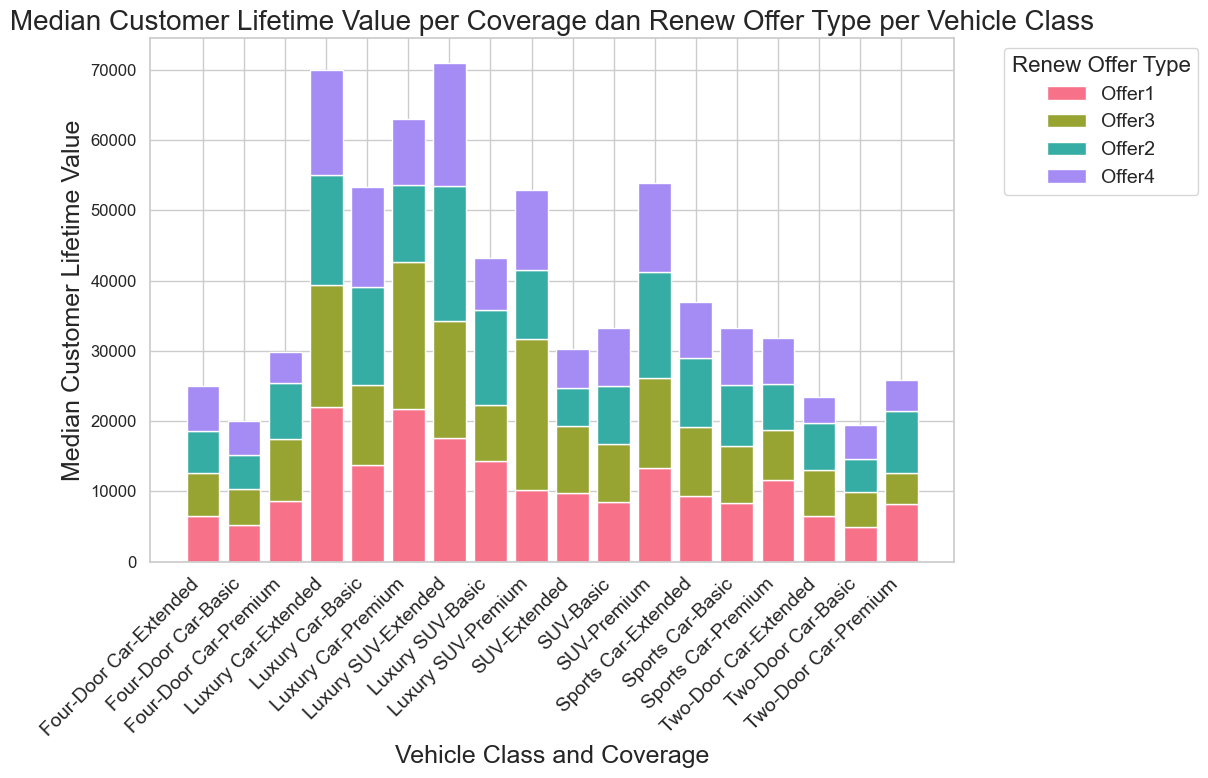

In [354]:
# Menghitung median Customer Lifetime Value untuk kombinasi Vehicle Class, Coverage, dan Renew Offer Type
df_median = df.groupby(['Vehicle Class', 'Coverage', 'Renew Offer Type'])['Customer Lifetime Value'].median().reset_index()

# Pivot data untuk memastikan stacked bar plot
pivot_df2 = df_median.pivot_table(index=['Vehicle Class', 'Coverage'], columns='Renew Offer Type', values='Customer Lifetime Value', fill_value=0).reset_index()

# Buat plot
fig, ax = plt.subplots(figsize=(12, 8))  # Ukuran grafik lebih kecil

# Set warna untuk setiap jenis Renew Offer Type
renew_offer_types = df['Renew Offer Type'].unique()
colors = sns.color_palette("husl", len(renew_offer_types))

# Loop through setiap Vehicle Class dan Coverage untuk plot
for i, vehicle_class in enumerate(pivot_df2['Vehicle Class'].unique()):
    for k, coverage in enumerate(df['Coverage'].unique()):
        bottom = 0
        for j, renew_offer_type in enumerate(renew_offer_types):
            if renew_offer_type in pivot_df2.columns:
                values = pivot_df2[(pivot_df2['Vehicle Class'] == vehicle_class) & (pivot_df2['Coverage'] == coverage)][renew_offer_type].values[0]
            else:
                values = 0
            
            ax.bar(vehicle_class + '-' + coverage, values, label=renew_offer_type if (i == 0 and k == 0) else "", color=colors[j], bottom=bottom)
            bottom += values

# Tambahkan judul dan label
plt.title('Median Customer Lifetime Value per Coverage dan Renew Offer Type per Vehicle Class', fontsize=20)
plt.xlabel('Vehicle Class and Coverage', fontsize=18)
plt.ylabel('Median Customer Lifetime Value', fontsize=18)

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=14)

# Tambahkan legenda
plt.legend(title='Renew Offer Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()


- Kelas Kendaraan "Luxury SUV" dengan tipe coverage extended memiliki CLV paling tinggi

- Penawaran Offer1 menjadi tipe penawaran dengan CLV tinggi, terutama untuk kelas kendaraan Luxury Car-Basic dan Luxury Car-Extended


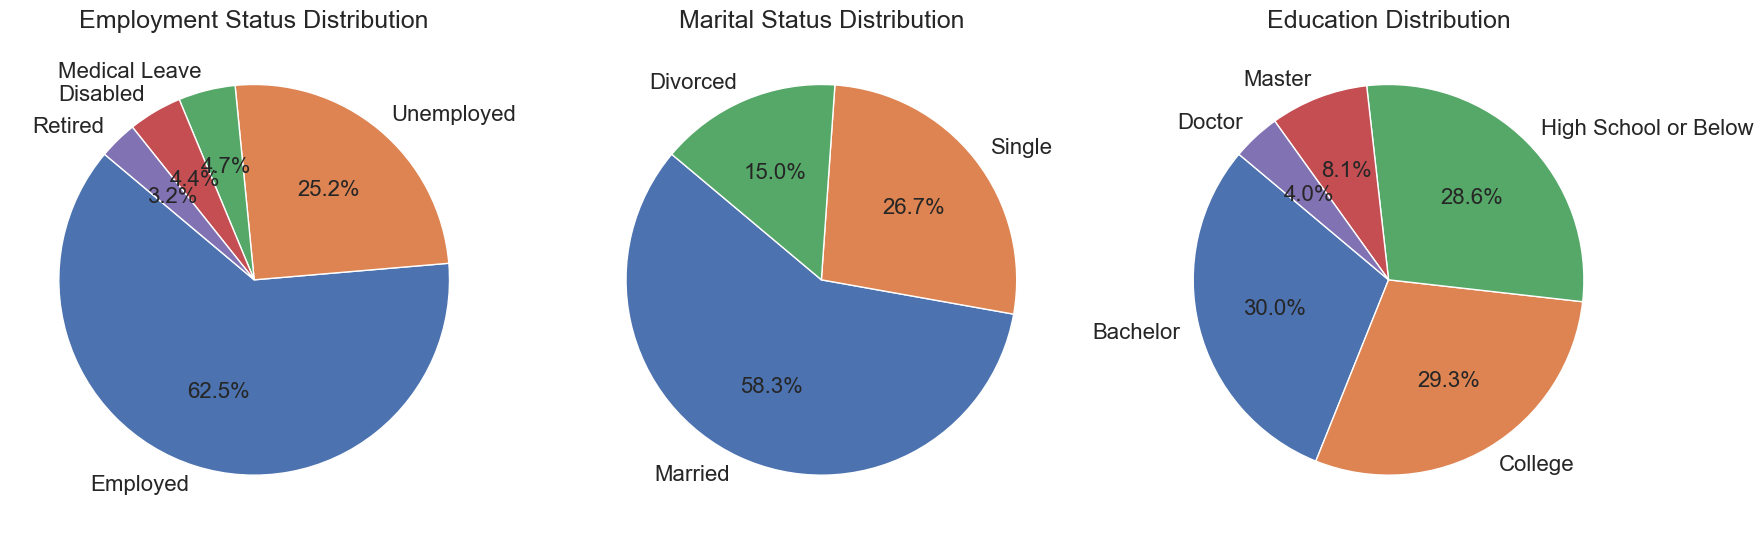

In [355]:
# Membuat subplot untuk masing-masing pie chart
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Ukuran figure dikurangi

# Pie chart untuk EmploymentStatus
employment_counts = df['EmploymentStatus'].value_counts()
wedges, texts, autotexts = axs[0].pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontsize=16))  # Ukuran font diperbesar
axs[0].set_title('Employment Status Distribution', fontsize=18)
plt.setp(texts, fontsize=16)
plt.setp(autotexts, fontsize=16)

# Pie chart untuk Marital Status
marital_counts = df['Marital Status'].value_counts()
wedges, texts, autotexts = axs[1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontsize=16))  # Ukuran font diperbesar
axs[1].set_title('Marital Status Distribution', fontsize=18)
plt.setp(texts, fontsize=16)
plt.setp(autotexts, fontsize=16)

# Pie chart untuk Education
education_counts = df['Education'].value_counts()
wedges, texts, autotexts = axs[2].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, textprops=dict(fontsize=16))  # Ukuran font diperbesar
axs[2].set_title('Education Distribution', fontsize=18)
plt.setp(texts, fontsize=16)
plt.setp(autotexts, fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()

Profil pelanggan paling banyak adalah Employed, Married, dan Bachelor Graduate

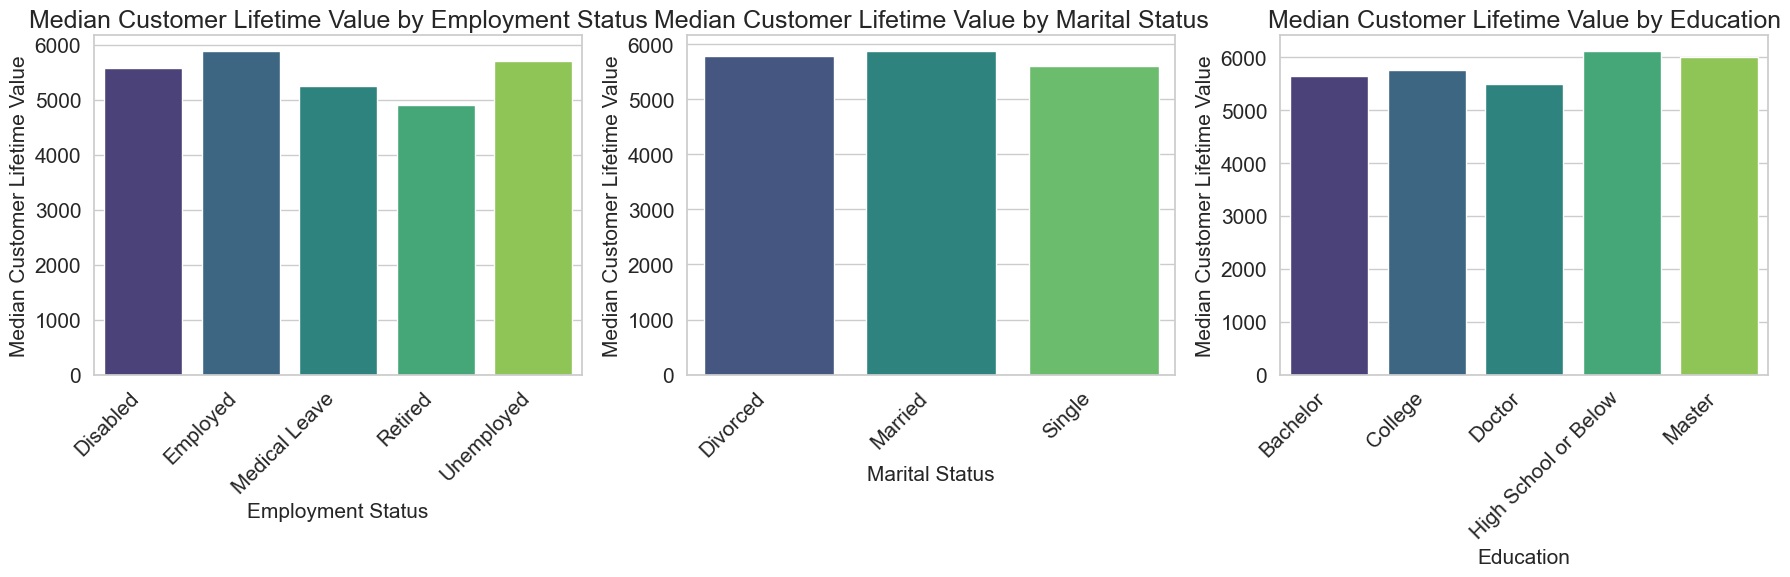

In [356]:
# Menghitung median Customer Lifetime Value berdasarkan Employment Status
employment_median_clv = df.groupby('EmploymentStatus')['Customer Lifetime Value'].median().reset_index()

# Menghitung median Customer Lifetime Value berdasarkan Marital Status
marital_median_clv = df.groupby('Marital Status')['Customer Lifetime Value'].median().reset_index()

# Menghitung median Customer Lifetime Value berdasarkan Education
education_median_clv = df.groupby('Education')['Customer Lifetime Value'].median().reset_index()

# Membuat subplot untuk masing-masing barchart
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Barchart untuk Employment Status
sns.barplot(data=employment_median_clv, x='EmploymentStatus', y='Customer Lifetime Value', palette='viridis', ax=axs[0])
axs[0].set_title('Median Customer Lifetime Value by Employment Status', fontsize=18)
axs[0].set_xlabel('Employment Status', fontsize=15)
axs[0].set_ylabel('Median Customer Lifetime Value', fontsize=15)
axs[0].tick_params(axis='x', labelsize=15)  
axs[0].tick_params(axis='y', labelsize=15)  
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')  

# Barchart untuk Marital Status
sns.barplot(data=marital_median_clv, x='Marital Status', y='Customer Lifetime Value', palette='viridis', ax=axs[1])
axs[1].set_title('Median Customer Lifetime Value by Marital Status', fontsize=18)
axs[1].set_xlabel('Marital Status', fontsize=15)
axs[1].set_ylabel('Median Customer Lifetime Value', fontsize=15)
axs[1].tick_params(axis='x', labelsize=15)  
axs[1].tick_params(axis='y', labelsize=15) 
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right') 

# Barchart untuk Education
sns.barplot(data=education_median_clv, x='Education', y='Customer Lifetime Value', palette='viridis', ax=axs[2])
axs[2].set_title('Median Customer Lifetime Value by Education', fontsize=18)
axs[2].set_xlabel('Education', fontsize=15)
axs[2].set_ylabel('Median Customer Lifetime Value', fontsize=15)
axs[2].tick_params(axis='x', labelsize=15)  
axs[2].tick_params(axis='y', labelsize=15)  
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')  

# Menampilkan plot
plt.tight_layout()
plt.show()

Customer Lifetime Value tertinggi yaitu pelanggan yang Employed, Married, dan Higschool or below graduate

Number of Policies,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00
Coverage,,,,,,,,,
Basic,"2,686.92","11,963.19","5,479.56","5,510.56","5,465.60","5,443.11","5,475.01","5,552.46","5,523.65"
Extended,"3,585.88","14,435.66","7,194.04","6,721.71","6,846.15","7,452.95","6,699.24","6,957.76","6,966.69"
Premium,"4,419.12","15,624.74","8,896.06","8,675.42","9,890.91","8,484.75","8,920.46","9,320.28","9,035.67"


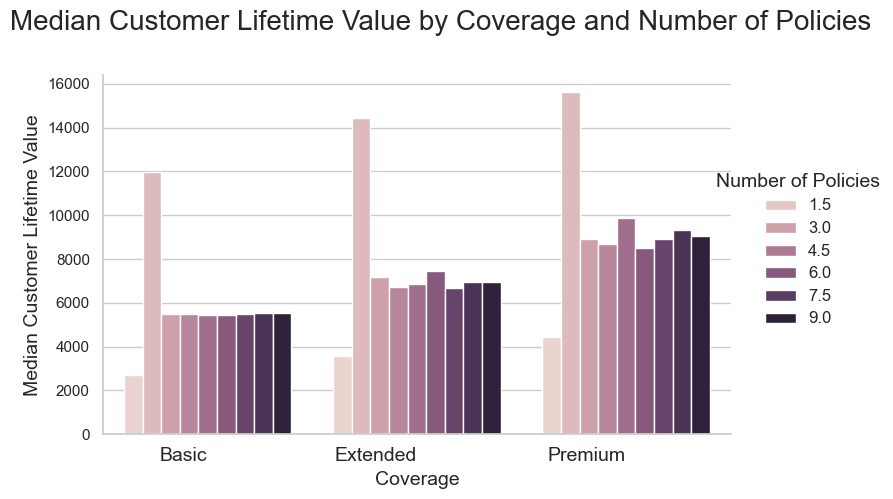

In [357]:
# Mengelompokkan data berdasarkan Coverage dan Number of Policies
# lalu menghitung median Customer Lifetime Value untuk setiap kelompok
pivot_df3 = df.groupby(['Coverage', 'Number of Policies'])['Customer Lifetime Value'].median().unstack(fill_value=0).fillna(0)

# Mengatur tampilan float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.2f}'.format

# Menampilkan pivot_df
display(pivot_df3)

# Mengonversi pivot table kembali ke format panjang
pivot_df3_long = pivot_df3.reset_index().melt(id_vars='Coverage', value_name='Median Customer Lifetime Value', var_name='Number of Policies')

# Mengatur style dan membuat plot
sns.set(style="whitegrid")
g = sns.catplot(data=pivot_df3_long, x='Coverage', y='Median Customer Lifetime Value', hue='Number of Policies', kind='bar', height=5, aspect=1.5)

# Mengatur ukuran font untuk label dan judul
g.set_xticklabels(ha='right', fontsize=14)
g.set_titles('Median Customer Lifetime Value by Coverage and Number of Policies', fontsize=16)
g.set_axis_labels('Coverage', 'Median Customer Lifetime Value', fontsize=14)

# Mengatur judul pada legenda
g.legend.set_title('Number of Policies')
plt.setp(g.legend.get_title(), fontsize=14)
plt.setp(g.legend.get_texts(), fontsize=12)

# Menambahkan judul di atas grafik
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Median Customer Lifetime Value by Coverage and Number of Policies', fontsize=20)

# Menampilkan plot
plt.show()

Customer Lifetime Value tertinggi pada jumlah polis 3 pada masing-masing tipe coverage

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,"35,294.50","33,265.50","39,974.00"
Luxury Car,"39,808.00","49,184.50","51,643.00"
Luxury SUV,"31,456.00","44,507.00","25,982.50"
SUV,"33,321.00","26,877.00","27,436.00"
Sports Car,"28,142.00","26,030.00","46,268.00"
Two-Door Car,"35,372.50","36,081.00","40,164.00"


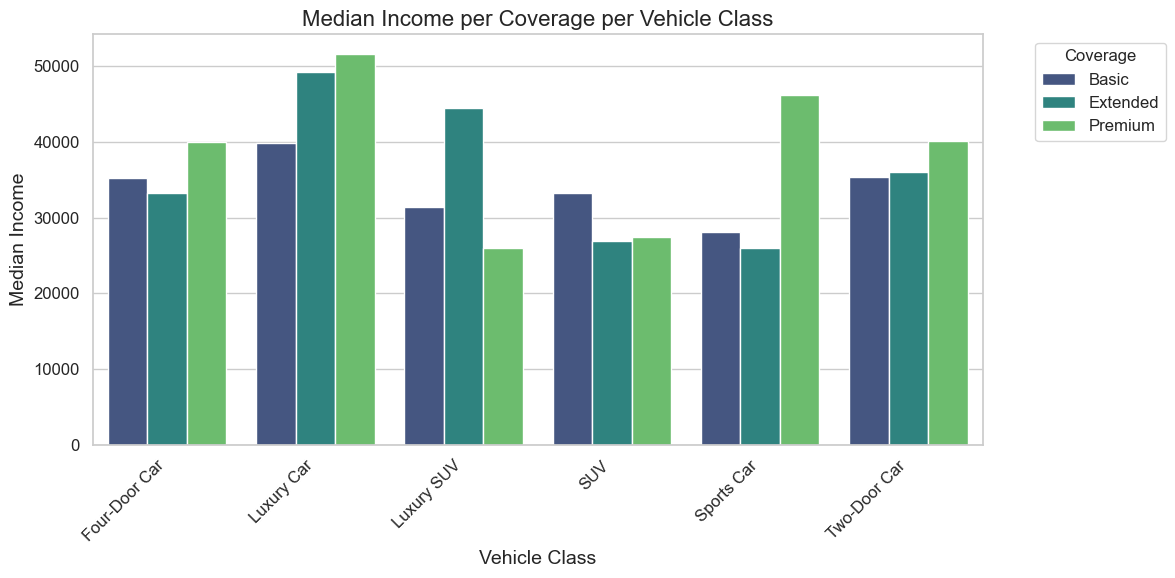

In [358]:
# Mengelompokkan data berdasarkan Vehicle Class dan Coverage
# lalu menghitung median Income untuk setiap kelompok
pivot_df_income = df.groupby(['Vehicle Class', 'Coverage'])['Income'].median().unstack(fill_value=0).fillna(0)

# Mengatur tampilan float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.2f}'.format

# Menampilkan pivot_df
display(pivot_df_income)

# Menghitung median Income untuk kombinasi Vehicle Class dan Coverage
df_median_income = df.groupby(['Vehicle Class', 'Coverage'])['Income'].median().reset_index()

# Menentukan ukuran font
plt.rc('font', size=14)          # ukuran font umum
plt.rc('axes', titlesize=16)     # ukuran font judul sumbu
plt.rc('axes', labelsize=14)     # ukuran font label sumbu
plt.rc('xtick', labelsize=12)    # ukuran font label sumbu x
plt.rc('ytick', labelsize=12)    # ukuran font label sumbu y
plt.rc('legend', fontsize=12)    # ukuran font legenda

# Buat plot dengan ukuran yang lebih kecil
plt.figure(figsize=(12, 6))  # Mengurangi ukuran figure untuk mengecilkan grafik
sns.barplot(data=df_median_income, x='Vehicle Class', y='Income', hue='Coverage', palette='viridis')

# Tambahkan judul dan label
plt.title('Median Income per Coverage per Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Median Income')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tambahkan legenda
plt.legend(title='Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()

- Income paling tinggi yaitu Luxury Car dengan tipe coverage premium
- Income paling rendah yaitu luxury SUV dengan tipe coverage premium

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,67.00,87.00,110.00
Luxury Car,189.00,223.00,283.00
Luxury SUV,193.00,216.50,273.50
SUV,109.00,129.00,166.00
Sports Car,110.00,132.00,156.00
Two-Door Car,67.00,88.00,110.00


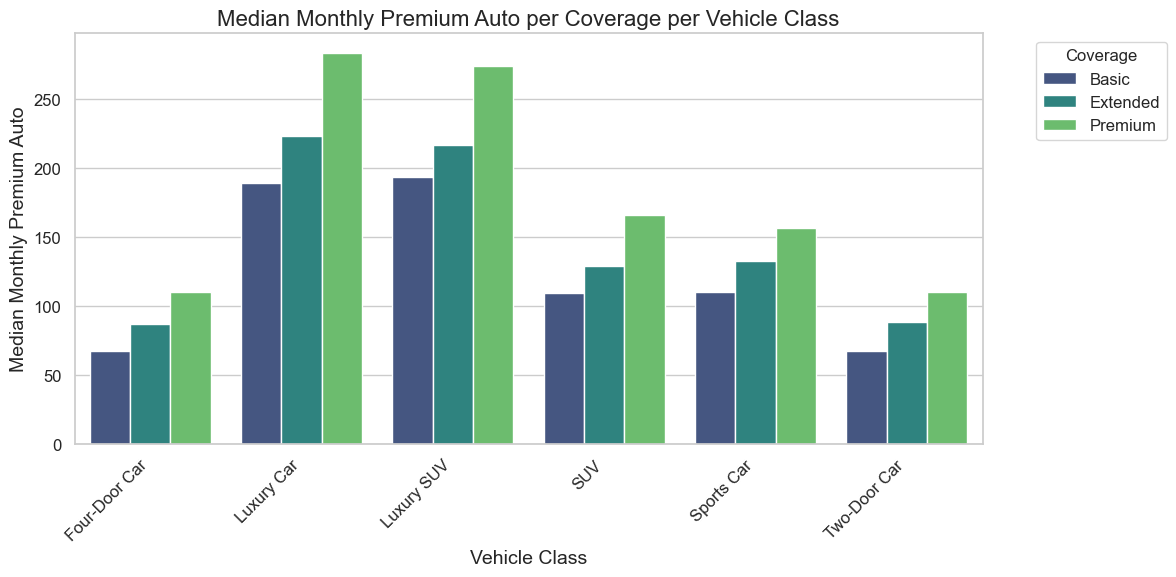

In [359]:
# Mengelompokkan data berdasarkan Vehicle Class dan Coverage
# lalu menghitung median Monthly Premium Auto untuk setiap kelompok
pivot_df_premium = df.groupby(['Vehicle Class', 'Coverage'])['Monthly Premium Auto'].median().unstack(fill_value=0).fillna(0)

# Mengatur tampilan float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.2f}'.format

# Menampilkan pivot_df
display(pivot_df_premium)

# Menghitung median Monthly Premium Auto untuk kombinasi Vehicle Class dan Coverage
df_median_premium = df.groupby(['Vehicle Class', 'Coverage'])['Monthly Premium Auto'].median().reset_index()

# Menentukan ukuran font
plt.rc('font', size=14)          # ukuran font umum
plt.rc('axes', titlesize=16)     # ukuran font judul sumbu
plt.rc('axes', labelsize=14)     # ukuran font label sumbu
plt.rc('xtick', labelsize=12)    # ukuran font label sumbu x
plt.rc('ytick', labelsize=12)    # ukuran font label sumbu y
plt.rc('legend', fontsize=12)    # ukuran font legenda

# Buat plot dengan ukuran yang lebih kecil
plt.figure(figsize=(12, 6))
sns.barplot(data=df_median_premium, x='Vehicle Class', y='Monthly Premium Auto', hue='Coverage', palette='viridis')

# Tambahkan judul dan label
plt.title('Median Monthly Premium Auto per Coverage per Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Median Monthly Premium Auto')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tambahkan legenda
plt.legend(title='Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()

Monthly Premium Auto paling tinggi yaitu luxury car dengan tipe coverage premium

Coverage,Basic,Extended,Premium
Vehicle Class,,,
Four-Door Car,"527,926.56","337,600.69","127,120.82"
Luxury Car,"63,135.01","34,432.79","20,754.48"
Luxury SUV,"55,696.74","46,107.53","22,116.14"
SUV,"346,001.98","207,293.79","75,665.25"
Sports Car,"89,558.92","54,163.69","23,136.43"
Two-Door Car,"224,897.15","139,075.38","50,963.52"


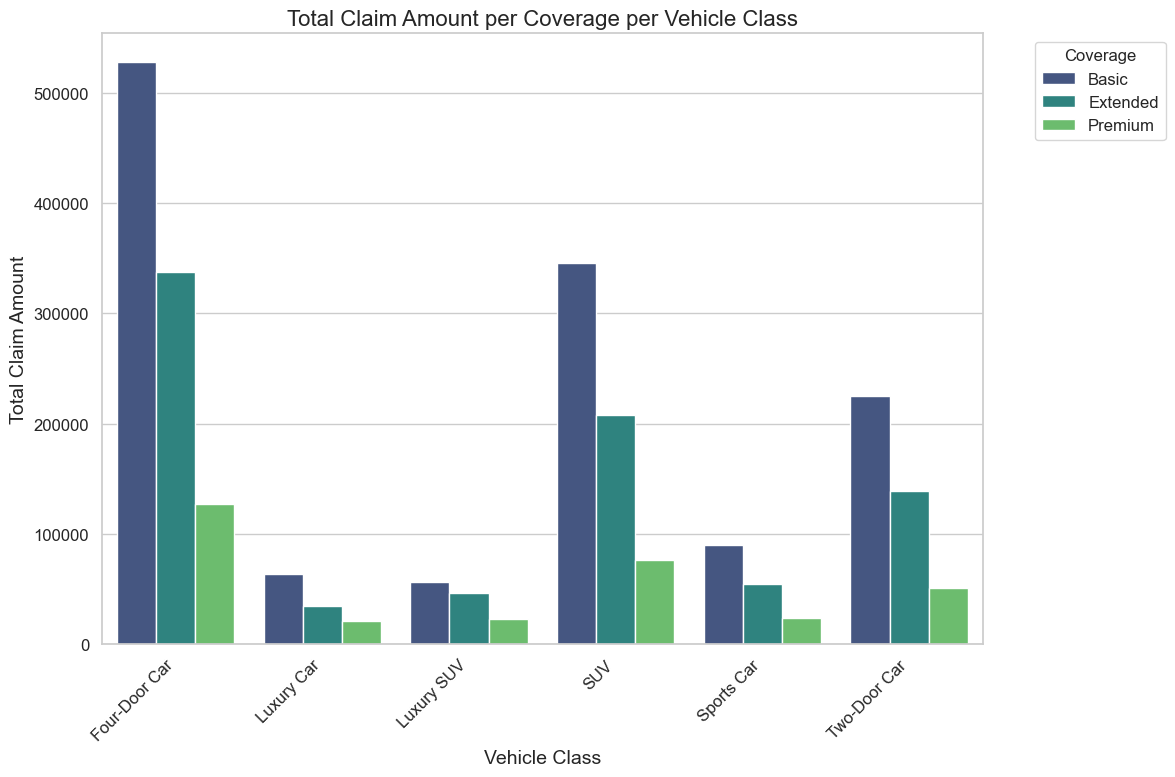

In [360]:
# Mengelompokkan data berdasarkan Vehicle Class dan Coverage
# lalu menghitung total Total Claim Amount untuk setiap kelompok
pivot_df_claim = df.groupby(['Vehicle Class', 'Coverage'])['Total Claim Amount'].sum().unstack(fill_value=0).fillna(0)

# Mengatur tampilan float agar tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:,.2f}'.format

# Menampilkan pivot_df
display(pivot_df_claim)

# Menghitung Total Claim Amount untuk kombinasi Vehicle Class dan Coverage
df_median_claim = df.groupby(['Vehicle Class', 'Coverage'])['Total Claim Amount'].sum().reset_index()

# Menentukan ukuran font
plt.rc('font', size=14)          # ukuran font umum
plt.rc('axes', titlesize=16)     # ukuran font judul sumbu
plt.rc('axes', labelsize=14)     # ukuran font label sumbu
plt.rc('xtick', labelsize=12)    # ukuran font label sumbu x
plt.rc('ytick', labelsize=12)    # ukuran font label sumbu y
plt.rc('legend', fontsize=12)    # ukuran font legenda

# Buat plot dengan ukuran yang lebih kecil
plt.figure(figsize=(12, 8))
sns.barplot(data=df_median_claim, x='Vehicle Class', y='Total Claim Amount', hue='Coverage', palette='viridis')

# Tambahkan judul dan label
plt.title('Total Claim Amount per Coverage per Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Total Claim Amount')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tambahkan legenda
plt.legend(title='Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()

Total Claim Amount tertinggi yaitu four door class dengan tipe coverage basic

### **Data Preprocessing**

In [361]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [362]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.00,6,"[SUV, Luxury Car]"
1,Coverage,object,0,0.00,3,"[Premium, Basic]"
2,Renew Offer Type,object,0,0.00,4,"[Offer1, Offer3]"
3,EmploymentStatus,object,0,0.00,5,"[Retired, Disabled]"
4,Marital Status,object,0,0.00,3,"[Divorced, Married]"
5,Education,object,0,0.00,5,"[Master, Bachelor]"
6,Number of Policies,float64,0,0.00,9,"[6.0, 4.0]"
7,Monthly Premium Auto,float64,0,0.00,191,"[168.0, 184.0]"
8,Total Claim Amount,float64,0,0.00,3274,"[503.144025, 266.144648]"
9,Income,float64,0,0.00,3625,"[88440.0, 46210.0]"


In [363]:
# Cek data duplikat
df_model.duplicated().sum()

618

In [364]:
# Menghapus data duplikat
df_model = df_model.drop_duplicates()
df_model

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.00,90.00,571.48,"11,828.00","10,083.49"
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.00,62.00,114.51,"44,762.00","4,943.39"
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.00,62.00,257.25,"21,514.00","11,981.98"
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.00,116.00,556.80,"17,913.00","4,550.86"
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.00,62.00,355.82,"19,030.00","2,372.16"
...,...,...,...,...,...,...,...,...,...,...,...
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.00,69.00,446.08,"30,595.00","8,114.41"
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.00,74.00,532.80,0.00,"2,442.22"
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.00,109.00,523.20,"27,778.00","12,904.94"
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.00,62.00,44.78,"84,658.00","2,447.05"


In [365]:
# Cek nilai missing value
df_model.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [366]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,"5,051.00","5,051.00","5,051.00","5,051.00","5,051.00"
mean,2.99,92.91,429.80,"37,739.84","8,059.48"
std,2.39,34.34,293.13,"30,691.45","6,989.19"
min,1.00,61.00,0.42,0.00,"1,898.01"
25%,1.00,68.00,251.78,0.00,"3,964.44"
50%,2.00,82.00,374.40,"34,322.00","5,837.53"
75%,4.00,109.00,548.12,"62,471.50","9,028.56"
max,9.00,297.00,"2,759.79","99,934.00","83,325.38"


Dari kelima fitur tersebut, fitur 'Income' dirasa tidak masuk akal bila nilainya 0. Itu berarti pelanggan yang memiliki asuransi tidak memiliki pendapatan. Oleh karena itu, data yang memiliki nilai income = 0 lebih baik di drop.

In [367]:
# Cek income yang bernilai 0
df_model[df_model['Income'] == 0]['Income'].count()

1332

In [368]:
# Cek income yang bernilai 0
income_zero = df_model[df_model['Income'] == 0]

# Menghitung jumlah income yang bernilai 0 untuk setiap kategori EmploymentStatus
employment_status_zero_income = income_zero['EmploymentStatus'].value_counts().reset_index()
employment_status_zero_income.columns = ['EmploymentStatus', 'Count']

# Menampilkan hasil
display(employment_status_zero_income)


,EmploymentStatus,Count
0,Unemployed,1332


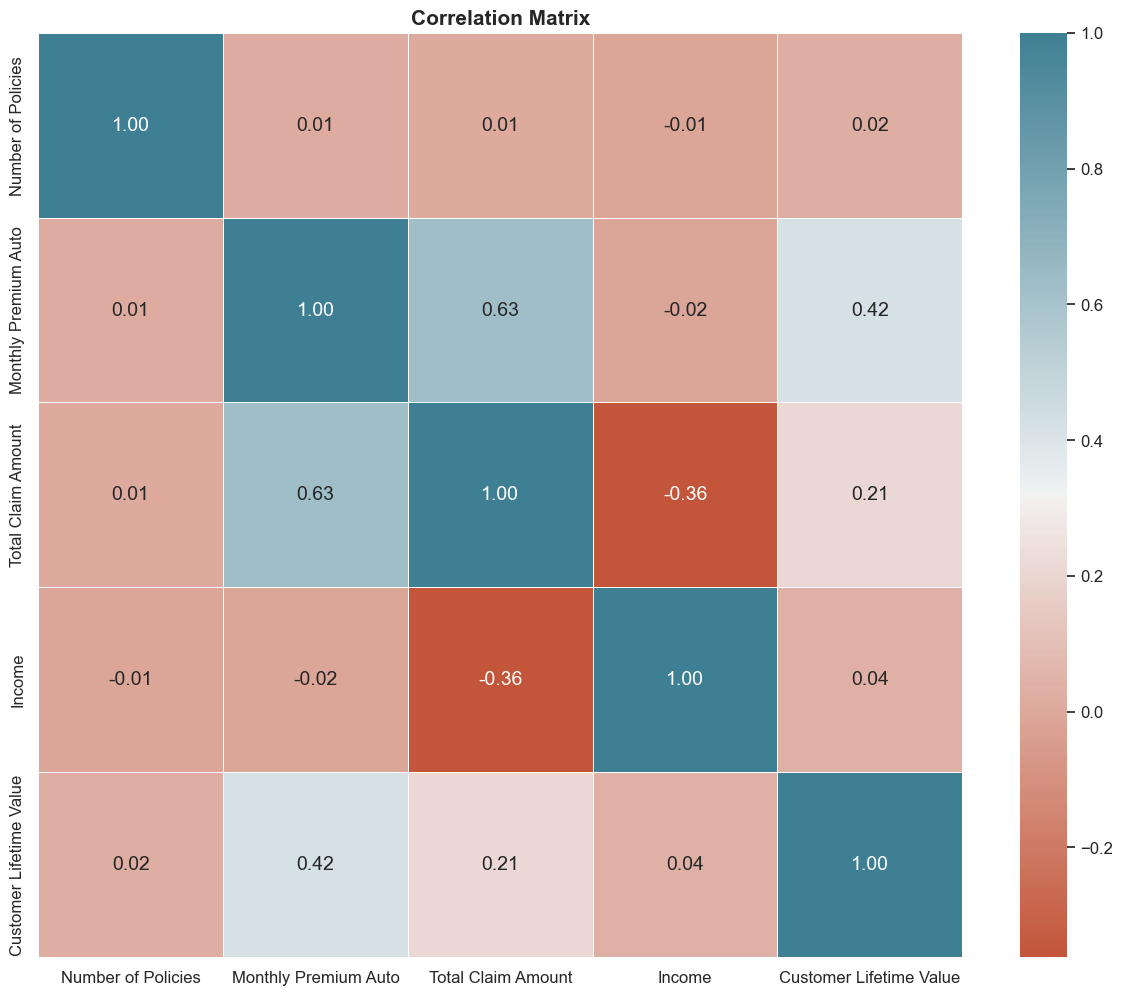

In [369]:
# Pilih kolom numerik
numeric_df = df_model.select_dtypes(include=[np.number])

# Hitung korelasi Pearson
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
corr = numeric_df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Berdasarkan matriks korelasi yang ditampilkan, berikut adalah hubungan variabel-variabel dengan Customer Lifetime Value (CLV):

- Monthly Premium Auto adalah variabel yang paling terkait dengan Customer Lifetime Value di antara variabel lain dalam data
- Total Claim Amount juga menunjukkan hubungan positif, meskipun lebih lemah dibandingkan dengan Monthly Premium Auto
- Variabel Number of Policies dan Income menunjukkan hubungan yang sangat lemah dengan Customer Lifetime Value

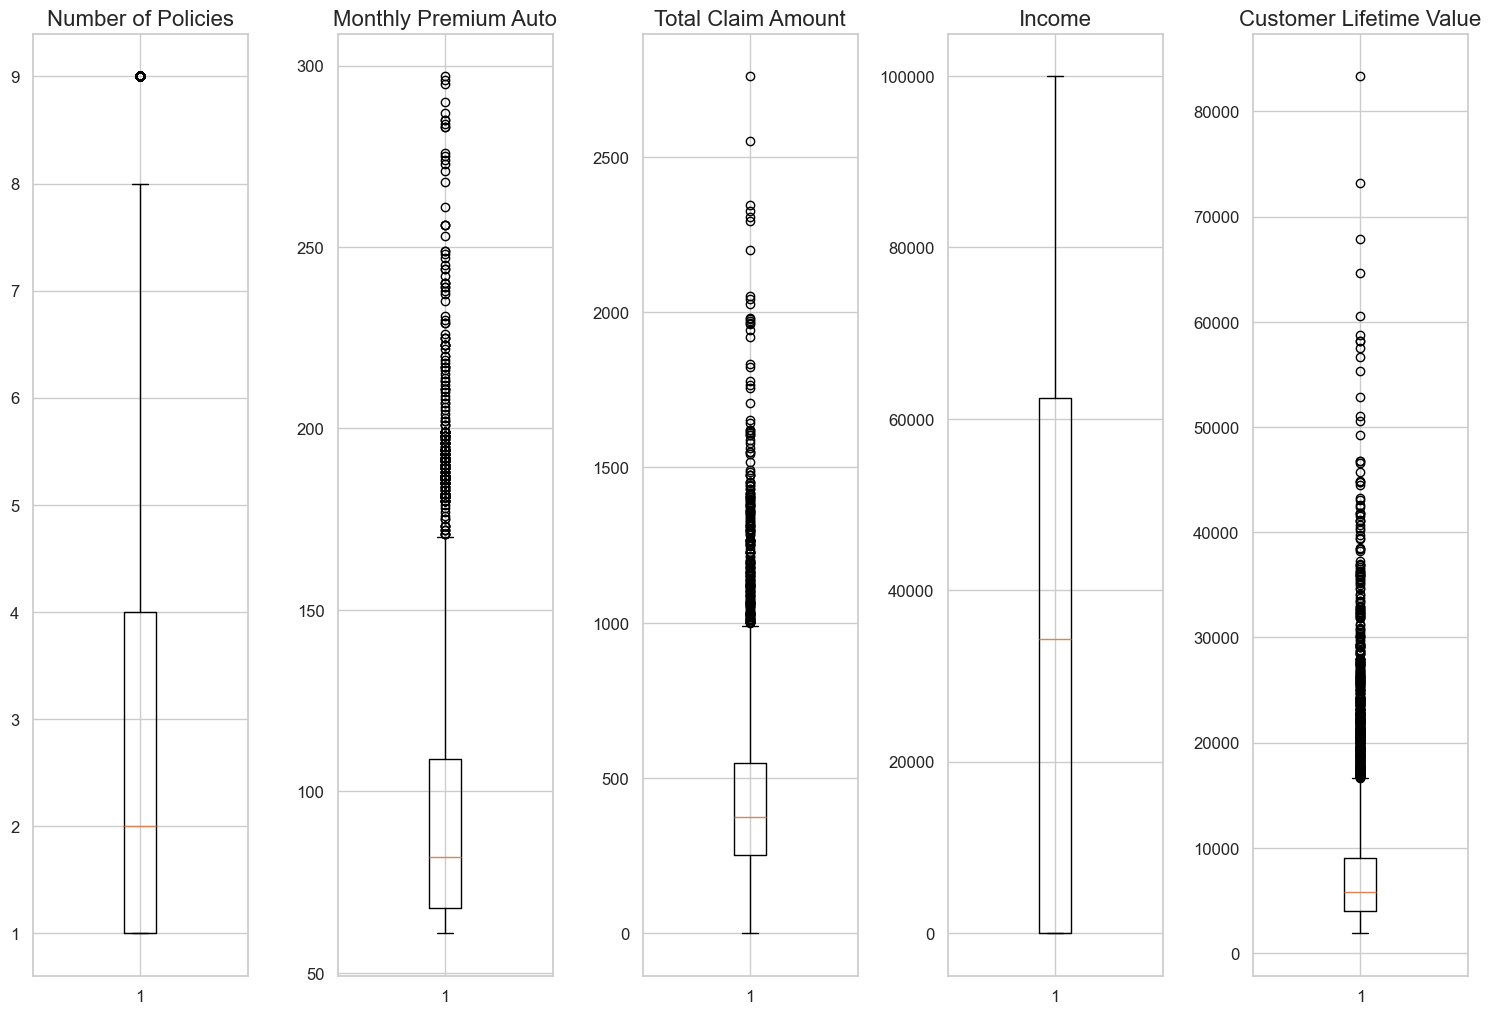

In [370]:
# Outliers - Boxplot


number_col = df_model.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col // 3) + (num_col % 3 > 0)

plt.figure(figsize=(15,20))

for i, column in enumerate(number_col,1) :
    plt.subplot(num_row,5,i)
    plt.boxplot(df_model[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [371]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [372]:
# Outliers pada fitur Monthly Premium Auto
find_anomalies(df_model['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [373]:
# Cek deskriptif statistik kolom Monthly Premium Auto
df_model['Monthly Premium Auto'].describe()

count   5,051.00
mean       92.91
std        34.34
min        61.00
25%        68.00
50%        82.00
75%       109.00
max       297.00
Name: Monthly Premium Auto, dtype: float64

In [374]:
# Cek Monthly Premium Auto > 170.5
df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

252

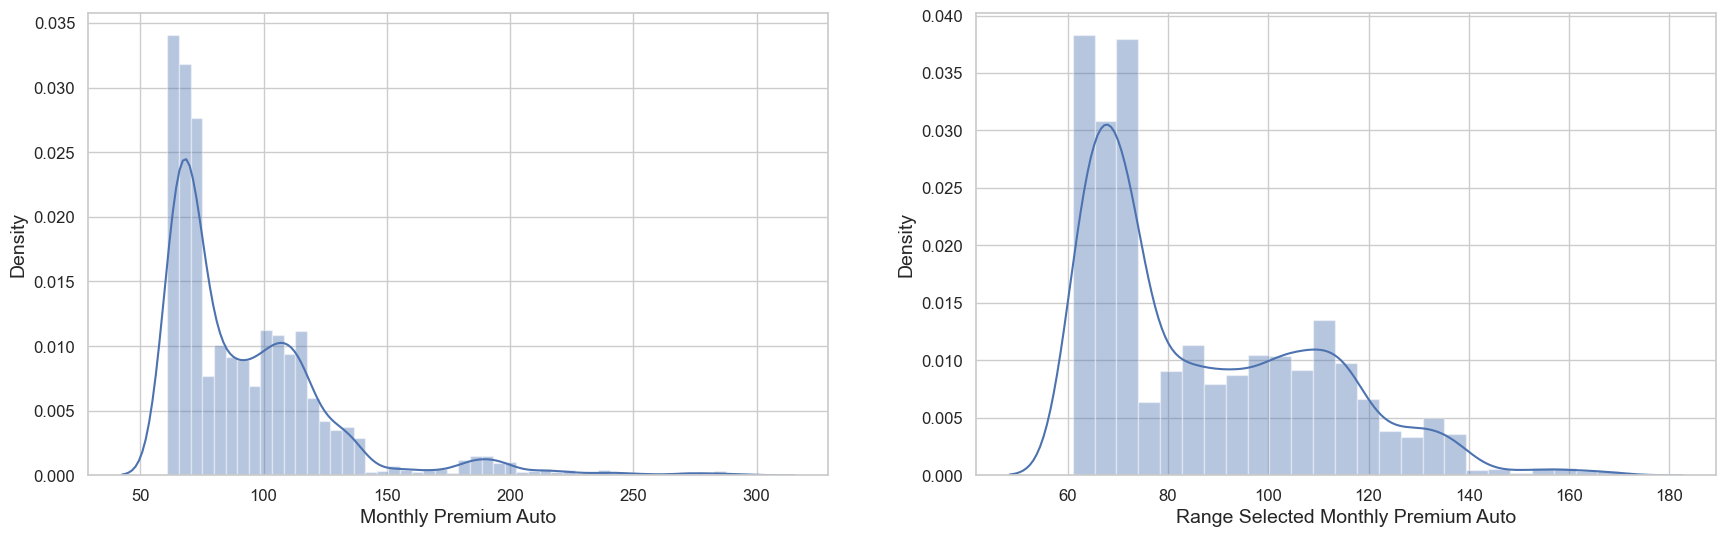

In [375]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Monthly Premium Auto'] <= 170.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0])
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [376]:
# Outliers pada fitur Total Claim Amount
find_anomalies(df_model['Total Claim Amount'])

IQR: 282.8229585
limit_bawah: -179.57706775000003
limit_atas: 951.7147662500001


In [377]:
# Cek deskriptif statistik kolom Total Claim Amount
df_model['Total Claim Amount'].describe()

count   4,799.00
mean      398.07
std       238.62
min         0.42
25%       244.66
50%       359.48
75%       527.48
max     1,516.38
Name: Total Claim Amount, dtype: float64

In [378]:
# Cek price > 951.7
df_model[df_model['Total Claim Amount'] > 951.7].count()['Total Claim Amount']

132

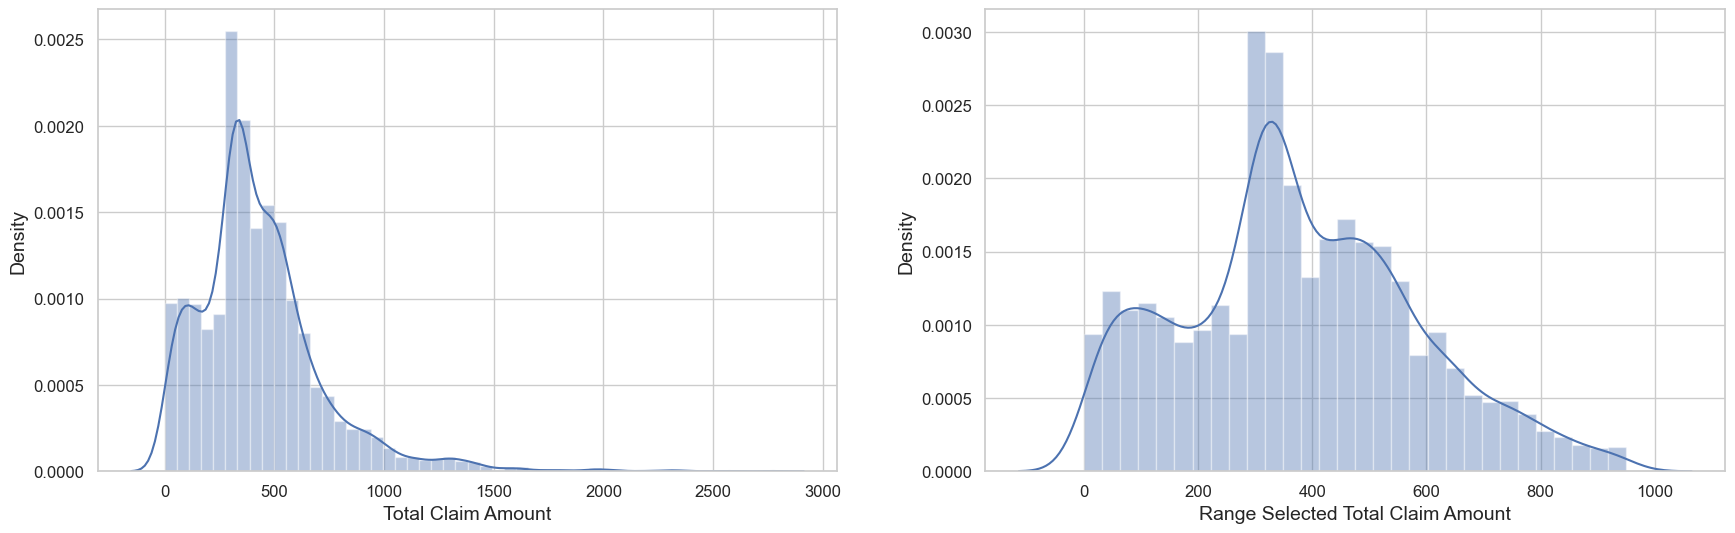

In [379]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Total Claim Amount'] <= 951.7)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

In [380]:
# Cek dataset yang sudah bersih
df_model.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.00,90.00,571.48,"11,828.00","10,083.49"
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.00,62.00,114.51,"44,762.00","4,943.39"
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.00,62.00,257.25,"21,514.00","11,981.98"
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.00,116.00,556.80,"17,913.00","4,550.86"
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.00,62.00,355.82,"19,030.00","2,372.16"


In [381]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4667 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4667 non-null   object 
 1   Coverage                 4667 non-null   object 
 2   Renew Offer Type         4667 non-null   object 
 3   EmploymentStatus         4667 non-null   object 
 4   Marital Status           4667 non-null   object 
 5   Education                4667 non-null   object 
 6   Number of Policies       4667 non-null   float64
 7   Monthly Premium Auto     4667 non-null   float64
 8   Total Claim Amount       4667 non-null   float64
 9   Income                   4667 non-null   float64
 10  Customer Lifetime Value  4667 non-null   float64
dtypes: float64(5), object(6)
memory usage: 437.5+ KB


In [405]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [383]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first'), ['EmploymentStatus', 'Marital Status']),
        ('Ordinal', OrdinalEncoder(), ['Education', 'Renew Offer Type', 'Coverage']),
        ('Binary', ce.BinaryEncoder(), ['Vehicle Class']),
        ('Robust', RobustScaler(), ['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Number of Policies'])
    ],
    remainder='passthrough'
)

**Data Splitting**

In [384]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

**Train and Test Splitting**

In [385]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [386]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-5984.02601737 -5924.59419522 -5930.75377329 -5645.1198375
 -5911.34561658] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3420.42808545 -3423.38110124 -3286.36353072 -3081.68272952
 -3231.10367486] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.41994566 -0.43259005 -0.40549693 -0.40118592 -0.43265031] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-6079.70049626 -5884.21875649 -5856.77596404 -5732.56694683
 -5991.12959513] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3446.65992502 -3441.15298465 -3242.76400953 -3092.1298809
 -3226.46697408] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                      

In [387]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,"-5,879.17",119.61,"-3,288.59",127.80,-0.42,0.01
1,KNN Regressor,"-5,908.88",118.62,"-3,289.83",136.24,-0.44,0.02
2,DecisionTree Regressor,"-4,985.29",127.51,"-1,828.05",102.22,-0.14,0.01
3,RandomForest Regressor,"-3,571.19",154.72,"-1,448.51",65.96,-0.11,0.00
4,XGBoost Regressor,"-3,709.11",167.10,"-1,557.78",63.40,-0.13,0.00


- Berdasarkan nilai RMSE, MAE, dan MAPE, Random Forest adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model RandomForest Regressor

In [388]:
# Benchmark model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,"3,920.75","1,662.26",0.13


**Hyperparameter Tuning**

In [389]:
# Jumlah pohon dalam hutan
n_estimators = list(np.arange(100, 201, 10))

# Kedalaman maksimum pohon
max_depth = list(np.arange(1, 21))

# Jumlah minimum sampel untuk melakukan split
min_samples_split = list(np.arange(2, 11))

# Jumlah minimum sampel per daun
min_samples_leaf = list(np.arange(1, 11))

# Jumlah fitur yang digunakan untuk setiap split
max_features = ['auto', 'sqrt', 'log2']

# Apakah akan menggunakan bootstrap samples ketika membangun pohon
bootstrap = [True, False]

# Kriteria yang digunakan untuk pembagian (split) di dalam pohon
criterion = ['squared_error', 'absolute_error', 'poisson']

# Hyperparameter space untuk Random Forest
hyperparam_space_rfr = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features,
    'model__bootstrap': bootstrap,
    'model__criterion': criterion
}

In [390]:
# Benchmark model dengan hyperparameter tuning
rfr = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rfr = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rfr)
        ])

# Hyperparameter tuning menggunakan RandomizedSearchCV
random_rfr = RandomizedSearchCV(
    estimator=estimator_rfr, 
    param_distributions=hyperparam_space_rfr,
    n_iter=50,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit='neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state=1  
)

In [391]:
# Fitting data training untuk mencari parameter terbaik
random_rfr.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Education',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Coverage']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Ve...
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 110, 120,
                                                                130, 140, 150,
                                                                160, 170, 180,
                                                                190, 200]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [392]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
results_df = pd.DataFrame(random_rfr.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
27,8.65,0.07,0.01,0.00,110,5,5,sqrt,10,absolute_error,...,76.97,1,-0.11,-0.11,-0.11,-0.10,-0.11,-0.11,0.00,1
44,12.03,0.08,0.02,0.00,170,5,5,sqrt,12,absolute_error,...,65.23,2,-0.11,-0.12,-0.11,-0.11,-0.11,-0.11,0.00,3
13,12.54,0.07,0.01,0.00,160,5,10,log2,15,absolute_error,...,75.64,3,-0.11,-0.11,-0.11,-0.11,-0.10,-0.11,0.00,2
7,9.64,0.09,0.02,0.01,120,5,4,log2,19,absolute_error,...,65.37,4,-0.12,-0.12,-0.11,-0.11,-0.11,-0.11,0.00,4
37,3.89,0.09,0.01,0.00,110,10,8,sqrt,14,absolute_error,...,69.20,5,-0.12,-0.12,-0.12,-0.12,-0.11,-0.12,0.00,5


In [393]:
# Cek skor dan params terbaik
print('Random Forest Regression')
print('Best_score:', random_rfr.best_score_)
print('Best_params:', random_rfr.best_params_)

Random Forest Regression
Best_score: -3615.7474258398643
Best_params: {'model__n_estimators': 100, 'model__min_samples_split': 3, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__max_depth': 14, 'model__criterion': 'poisson', 'model__bootstrap': False}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Random Forest Regression dan hyperparameter terpilih.

In [394]:
# Model RandomForest
model = {'RFR': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rfr_tuning = random_rfr.best_estimator_

# Fitting model
rfr_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rfr_tuning = rfr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rfr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rfr_tuning))
mae_rfr_tuning = mean_absolute_error(y_test, y_pred_rfr_tuning)
mape_rfr_tuning = mean_absolute_percentage_error(y_test, y_pred_rfr_tuning)

# Simpan hasil evaluasi ke dalam DataFrame
score_after_tuning_rfr = pd.DataFrame({'RMSE': rmse_rfr_tuning, 'MAE': mae_rfr_tuning, 'MAPE': mape_rfr_tuning}, index=model.keys())
score_after_tuning_rfr


,RMSE,MAE,MAPE
RFR,"3,891.37","1,726.48",0.14


**Performance Comparison**

Perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning.

In [395]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning)

,RMSE,MAE,MAPE
RandomForest,"3,920.75","1,662.26",0.13


In [396]:
# Setelah hyperparameter tuning
score_after_tuning_rfr

,RMSE,MAE,MAPE
RFR,"3,891.37","1,726.48",0.14


Model mengalami peningkatan performa (nilai RMSE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

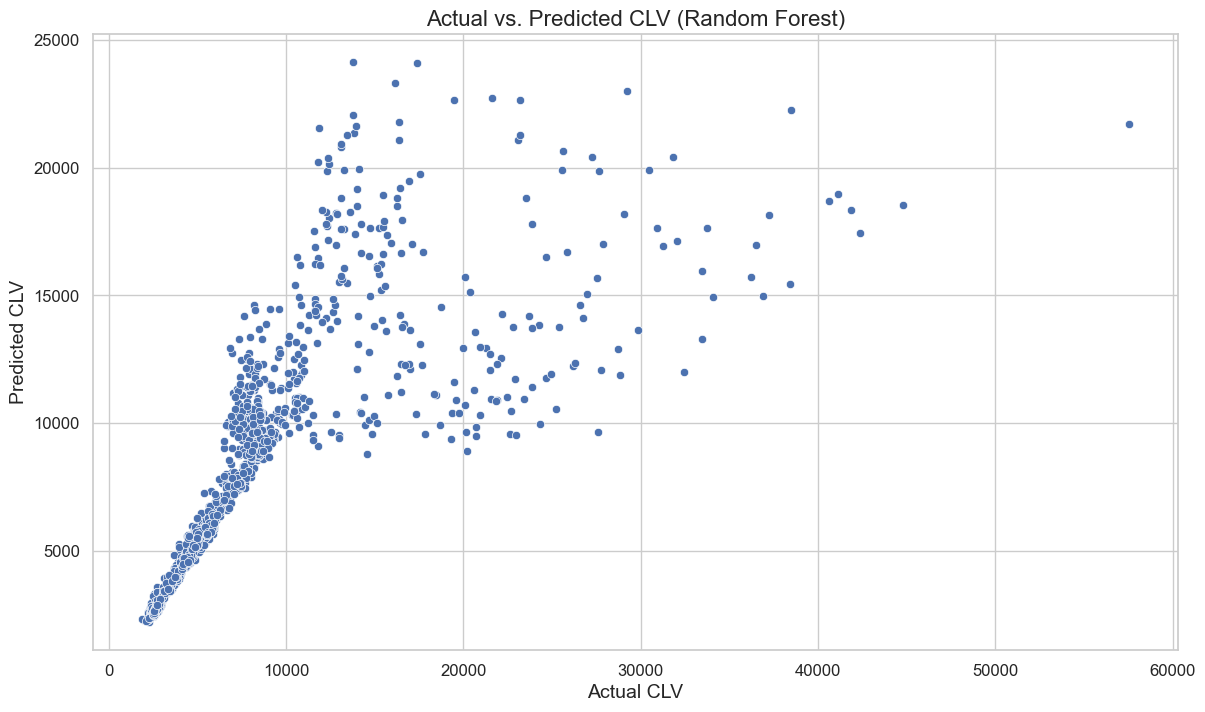

In [397]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_rfr_tuning).set(
    title='Actual vs. Predicted CLV (Random Forest)', 
    xlabel='Actual CLV', 
    ylabel='Predicted CLV'
)
plt.show()

dengan MAPE 14%. Menurut Lewis (1982) model tersebut memiliki performa yang baik dalam memprediksi, dengan kesalahan rata-rata persentase absolut di bawah 20%.

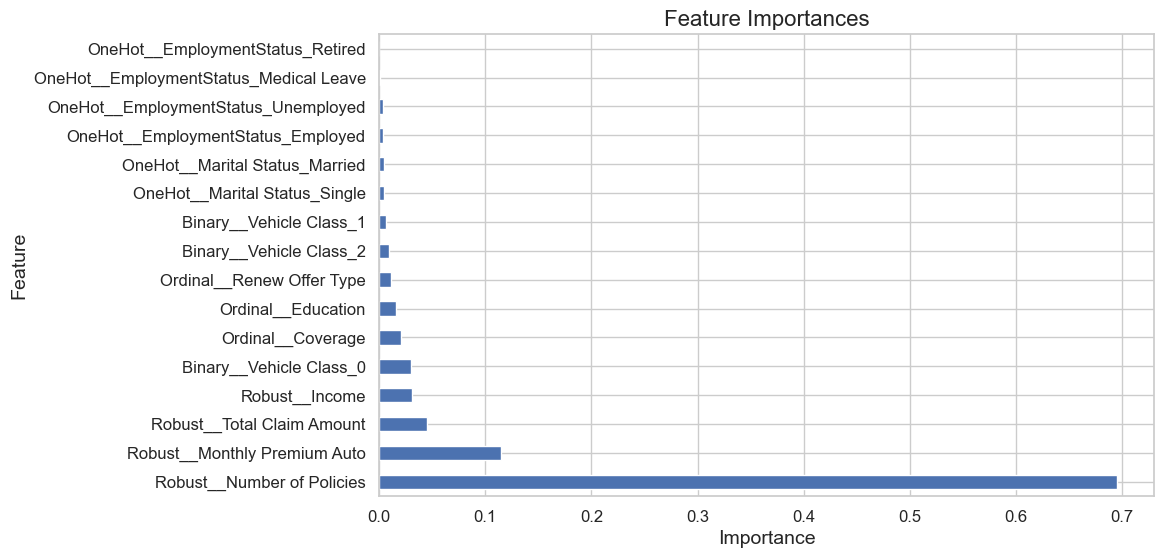

In [410]:
# Akses model dari dictionary
model = rfr_tuning['model']

# Ambil feature importances
importances = model.feature_importances_

# Dapatkan nama fitur setelah transformasi
feature_names = transformer.get_feature_names_out()  # Ganti dengan metode atau cara sesuai dengan transformer yang Anda gunakan

# Buat Series dengan importances dan nama fitur
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Conclusion**

- Random forest merupakan best model dengan RMSE 3,891.37, MAE 1,726.48, dan MAPE 14%.
- Menurut Lewis (1982) model dengan MAPE 14% tersebut memiliki performa yang baik dalam memprediksi, dengan kesalahan rata-rata persentase absolut di bawah 20%
- Feature yang paling mempengaruhi CLV adalah Number of Policies

**Recommendation**

- Dapat dilakukan penambahan data dan feature yang dapat mempengaruhi CLV, antara lain durasi atau kontinuitas kepemilikan polis asuransi, frekuensi pembayaran premi secara tepat waktu atau pembayaran tahunan, rating dari pelanggan terkait kualitas layanan, dan sebagainya.
